In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df_train = pd.read_csv('../raw/train.csv', nrows=500000)

In [3]:
df_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


       Demanda_uni_equil
count         494.000000
mean           27.149782
std            61.499578
min             0.000000
25%             3.646413
50%             8.758658
75%            28.411070
max           989.333333


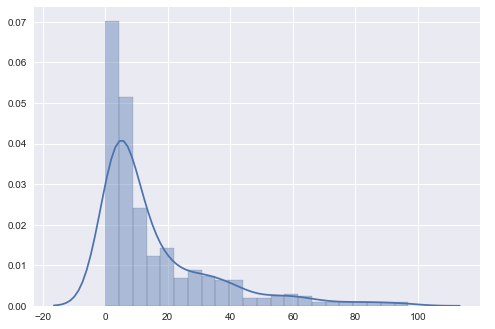

In [15]:
byproduct = df_train.groupby('Producto_ID').agg({'Demanda_uni_equil': 'mean'})
print(byproduct.describe())

demand_by_prod = byproduct.query('Demanda_uni_equil < 100')['Demanda_uni_equil'].tolist()
sns.distplot(demand_by_prod)